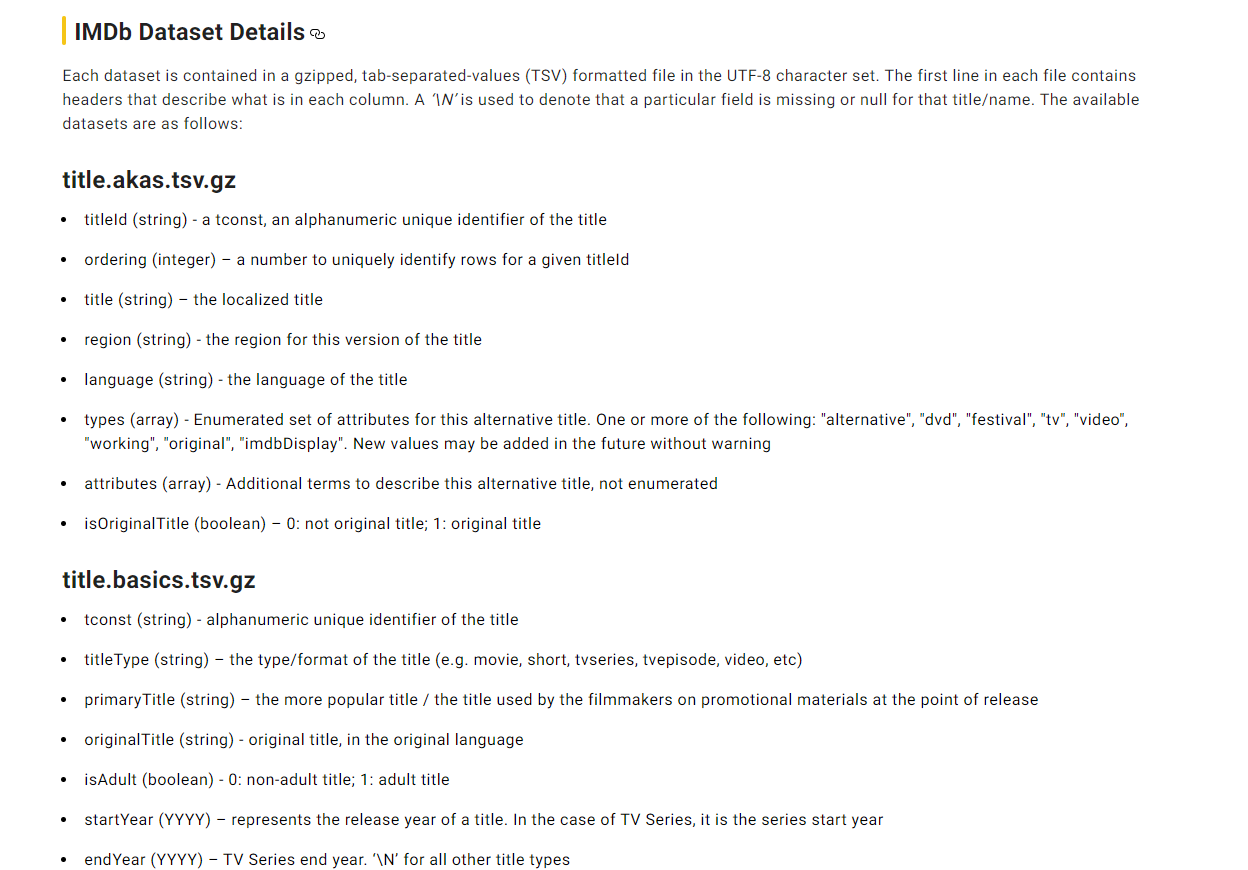
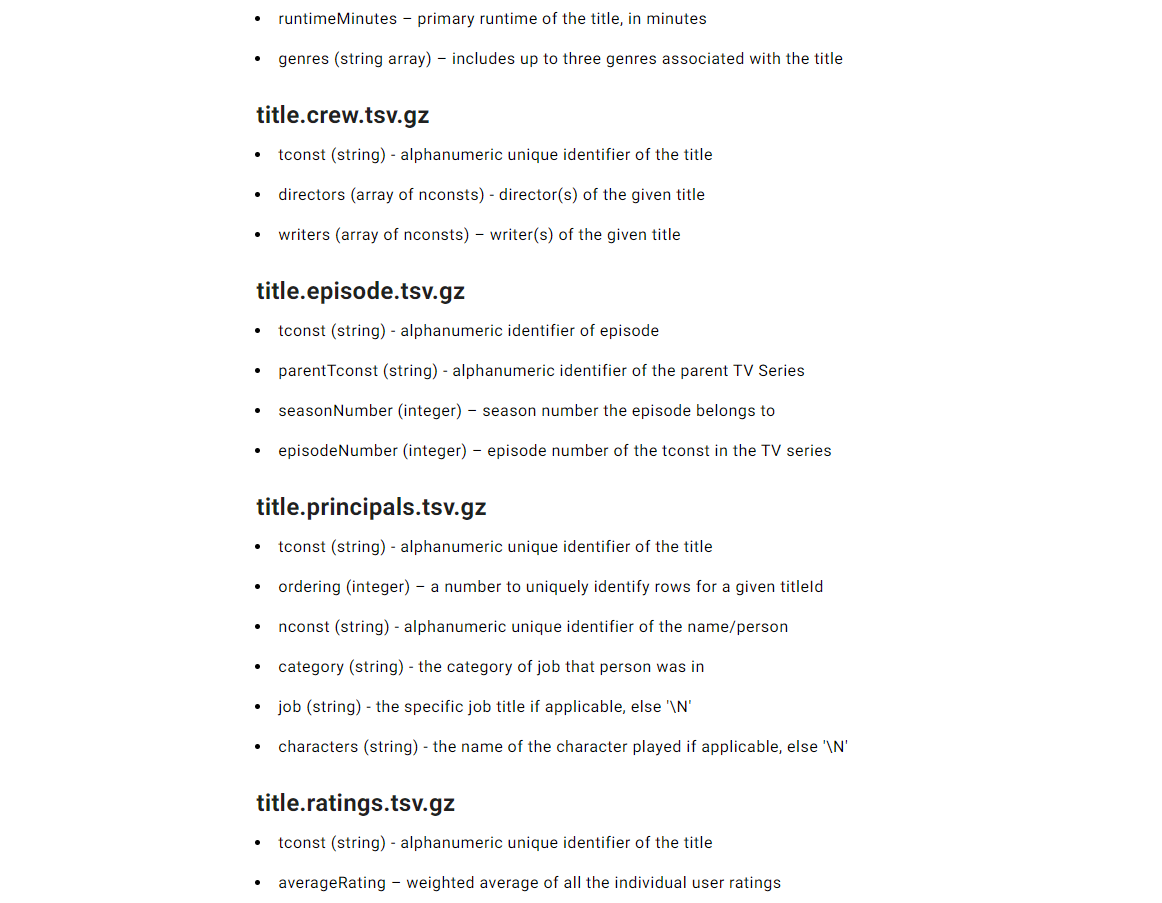
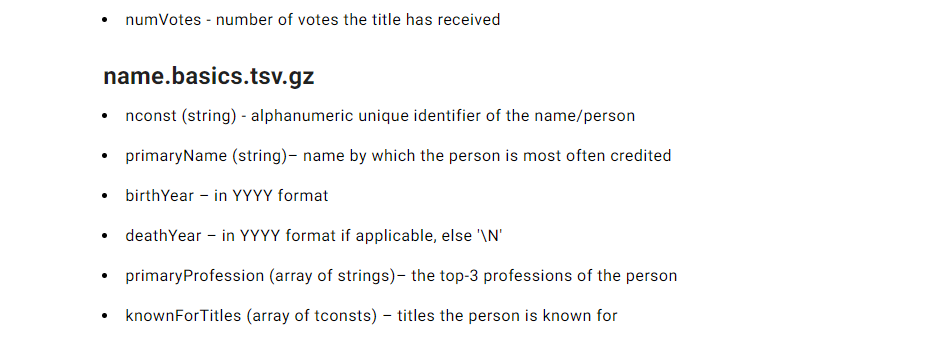


In [143]:
import pandas as pd
import numpy as np

In [144]:
titles = pd.read_csv("Data/title-akas-us-only.csv", low_memory=False)

In [145]:
titles.head(10)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
1,tt0000002,7,The Clown and His Dogs,US,\N,\N,literal English title,0
2,tt0000005,10,Blacksmith Scene,US,\N,imdbDisplay,\N,0
3,tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0
4,tt0000005,6,Blacksmith Scene #1,US,\N,alternative,\N,0
5,tt0000005,7,Blacksmithing,US,\N,\N,informal alternative title,0
6,tt0000006,3,Chinese Opium Den,US,\N,imdbDisplay,\N,0
7,tt0000007,1,Corbett and Courtney Before the Kinetograph,US,\N,imdbDisplay,\N,0
8,tt0000007,5,The Corbett-Courtney Fight,US,\N,alternative,\N,0
9,tt0000007,6,Jim Corbett vs. Peter Courtney,US,\N,alternative,\N,0


In [146]:
basics = pd.read_csv('Data/title.basics.tsv.gz', sep='\t', low_memory=False)

In [147]:
basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [148]:
# Filter the basics table down to only include the US by using the filter akas dataframe
filter_us_titles = basics['tconst'].isin(titles['titleId'])
basics = basics[filter_us_titles]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
...,...,...,...,...,...,...,...,...,...
10016872,tt9916560,tvMovie,March of Dimes Presents: Once Upon a Dime,March of Dimes Presents: Once Upon a Dime,0,1963,\N,58,Family
10016901,tt9916620,movie,The Copeland Case,The Copeland Case,0,\N,\N,\N,Drama
10016939,tt9916702,short,Loving London: The Playground,Loving London: The Playground,0,\N,\N,\N,"Drama,Short"
10016962,tt9916756,short,Pretty Pretty Black Girl,Pretty Pretty Black Girl,0,2019,\N,\N,Short


In [149]:
basics = basics.replace({'\\N':np.nan})

In [150]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365643 entries, 0 to 10016966
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          1365643 non-null  object
 1   titleType       1365643 non-null  object
 2   primaryTitle    1365643 non-null  object
 3   originalTitle   1365643 non-null  object
 4   isAdult         1365643 non-null  object
 5   startYear       1266978 non-null  object
 6   endYear         37130 non-null    object
 7   runtimeMinutes  862524 non-null   object
 8   genres          1337027 non-null  object
dtypes: object(9)
memory usage: 104.2+ MB


In [151]:
# drop rows with null vaules in the runtime and genres columns
basics = basics.dropna(subset=['runtimeMinutes', 'genres'])

In [152]:
# verify rows are dropped
basics['genres'].isna().sum()

0

In [153]:
# verify rows are dropped
basics['runtimeMinutes'].isna().sum()

0

In [154]:
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,NaN,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,NaN,1,"Short,Sport"
...,...,...,...,...,...,...,...,...,...
10016704,tt9916214,short,Drown the Clown,Drown the Clown,0,2019,NaN,8,"Drama,Short"
10016724,tt9916254,video,Big Tit Cream Pie 32,Big Tit Cream Pie 32,1,2015,NaN,226,Adult
10016770,tt9916348,video,Ancient World Exposed,Ancient World Exposed,0,2019,NaN,67,History
10016777,tt9916362,movie,Coven,Akelarre,0,2020,NaN,92,"Drama,History"


In [155]:
basics['startYear'] = basics['startYear'].fillna(9999)
basics['startYear'].isna().sum()

0

In [156]:
basics['startYear'] = basics['startYear'].astype(float)
basics['startYear'].dtype

dtype('float64')

In [157]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853335 entries, 0 to 10016872
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          853335 non-null  object 
 1   titleType       853335 non-null  object 
 2   primaryTitle    853335 non-null  object 
 3   originalTitle   853335 non-null  object 
 4   isAdult         853335 non-null  object 
 5   startYear       853335 non-null  float64
 6   endYear         20211 non-null   object 
 7   runtimeMinutes  853335 non-null  object 
 8   genres          853335 non-null  object 
dtypes: float64(1), object(8)
memory usage: 65.1+ MB


In [158]:
basics['titleType'].value_counts()

short           278334
movie           203476
tvEpisode       173684
video           115616
tvSeries         36847
tvMovie          25949
tvSpecial         9289
tvMiniSeries      5845
tvShort           4101
videoGame          194
Name: titleType, dtype: int64

In [159]:
filtered_basics = (basics['titleType'].str.contains('movie'))

In [160]:
filtered_basics

0           False
1           False
4           False
5           False
6           False
            ...  
10016704    False
10016724    False
10016770    False
10016777     True
10016872    False
Name: titleType, Length: 853335, dtype: bool

In [161]:
bf = basics[filtered_basics]
bf

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,NaN,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,NaN,100,"Documentary,News,Sport"
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906.0,NaN,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907.0,NaN,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908.0,NaN,120,"Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...
10016366,tt9915436,movie,Vida em Movimento,Vida em Movimento,0,2019.0,NaN,70,Documentary
10016544,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019.0,NaN,97,"Comedy,Drama,Fantasy"
10016684,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51,Drama
10016693,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller"


In [162]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203476 entries, 8 to 10016777
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          203476 non-null  object 
 1   titleType       203476 non-null  object 
 2   primaryTitle    203476 non-null  object 
 3   originalTitle   203476 non-null  object 
 4   isAdult         203476 non-null  object 
 5   startYear       203476 non-null  float64
 6   endYear         0 non-null       object 
 7   runtimeMinutes  203476 non-null  object 
 8   genres          203476 non-null  object 
dtypes: float64(1), object(8)
memory usage: 15.5+ MB


In [163]:
filtered_basics.sum()

203476

In [164]:
year_bf_filter = (bf['startYear'] >=2000) & (bf['startYear'] <= 2022)
f_bf = bf[year_bf_filter]
f_bf.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
61114,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
67666,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
86793,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
93930,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


In [165]:
f_bf['genres'].value_counts()

Documentary                      21375
Drama                            17085
Comedy                            7148
Horror                            4071
Comedy,Drama                      4000
                                 ...  
Adult,Crime,Mystery                  1
Comedy,Documentary,Reality-TV        1
Biography,Music,Mystery              1
Comedy,Reality-TV,Romance            1
Biography,Fantasy,Musical            1
Name: genres, Length: 1054, dtype: int64

In [166]:
filter_documentaries = ~f_bf['genres'].str.contains('Documentary')

In [167]:
t_df = f_bf[filter_documentaries]

In [168]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86979 entries, 34802 to 10016777
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          86979 non-null  object 
 1   titleType       86979 non-null  object 
 2   primaryTitle    86979 non-null  object 
 3   originalTitle   86979 non-null  object 
 4   isAdult         86979 non-null  object 
 5   startYear       86979 non-null  float64
 6   endYear         0 non-null      object 
 7   runtimeMinutes  86979 non-null  object 
 8   genres          86979 non-null  object 
dtypes: float64(1), object(8)
memory usage: 6.6+ MB


In [169]:
t_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
61114,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
67666,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
86793,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
93930,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


In [170]:
t_df.to_csv('Data/titles_filtered.csv')

In [171]:
ratings = pd.read_csv('Data/title.ratings.tsv.gz', sep='\t', low_memory=False)

In [172]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1988
1,tt0000002,5.8,265
2,tt0000003,6.5,1849
3,tt0000004,5.5,178
4,tt0000005,6.2,2632


In [173]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331492 entries, 0 to 1331491
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1331492 non-null  object 
 1   averageRating  1331492 non-null  float64
 2   numVotes       1331492 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 30.5+ MB


In [174]:
full_filter = ratings['tconst'].isin(t_df['tconst'])
ratings = ratings[full_filter]
ratings

,tconst,averageRating,numVotes
17961,tt0035423,6.4,87153
40764,tt0062336,6.4,175
46645,tt0069049,6.7,7754
63640,tt0088751,5.2,336
69953,tt0096056,5.6,846
...,...,...,...
1331411,tt9914942,6.6,178
1331437,tt9915872,6.4,9
1331450,tt9916170,7.0,7
1331451,tt9916190,3.7,243


In [175]:
ratings = ratings.replace({'\\N':np.nan})

In [176]:
ratings.head()

,tconst,averageRating,numVotes
17961,tt0035423,6.4,87153
40764,tt0062336,6.4,175
46645,tt0069049,6.7,7754
63640,tt0088751,5.2,336
69953,tt0096056,5.6,846


In [177]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71900 entries, 17961 to 1331462
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         71900 non-null  object 
 1   averageRating  71900 non-null  float64
 2   numVotes       71900 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [178]:
ratings.to_csv('Data/ratings_filtered.csv')